<a href="https://colab.research.google.com/github/aisha-partha/AIMLOps-Assignments/blob/main/M1_AST_02_XGBoost_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Programme in AI and MLOps
## A programme by IISc and TalentSprint
### Assignment 2: Extreme Gradient Boosting

## Learning Objectives:

At the end of the experiment, you will be able to:

*  perform preprocessing for different types of features
*  build pipeline for preprocessing of features
*  implement feature selection manually and automatically
*  build an XG-Boost regressor model and check its performance

## Introduction

Predicting house prices is helpful to identify profitable investments or to determine whether the price advertised is over or under-estimated. Here, we will build an ML model to predict the sale price of homes based on different explanatory variables describing the aspects of residential houses.

## Dataset

The dataset chosen is a [Housing dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) containing 79 features, one target feature (`SalePrice`), and 1460 samples. Visit the data source to understand each feature/column. Download the 'data_description.txt' file, which gives a full description.

### Setup Steps:

In [118]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2304896" #@param {type:"string"}

In [119]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "9916583736" #@param {type:"string"}

In [120]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "M1_AST_02_XGBoost_A" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")

    ipython.magic("sx wget https://cdn.iisc.talentsprint.com/AIandMLOps/Datasets/housing_dataset.csv")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aimlops-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Install XG-Boost and feature_engine library

In [121]:
!pip -q install xgboost
!pip -q install feature_engine

Ignore the above warning.

### Import required packages

In [122]:
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute  import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder as OrdinalEncoder_Sk
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error, r2_score

from feature_engine.imputation import ArbitraryNumberImputer, CategoricalImputer

from feature_engine.encoding import RareLabelEncoder,OrdinalEncoder
from feature_engine.selection import DropFeatures

# to visualise all the columns and upto 100 rows in the dataframe
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", 100)

# for supressing warnings
import warnings
warnings.filterwarnings('ignore')

### Load the data

In [123]:
# YOUR CODE HERE

data = pd.read_csv('housing_dataset.csv')

## Exploratory Data Analysis

Check the information of the dataframe regarding number of rows and columns, any null values, data types, etc.

In [124]:
# YOUR CODE HERE

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Summarising the Data

The following cell displays the types of features, the number of unique entries, and the percentage of Null entries in each feature column.

In [125]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [126]:
summary = pd.DataFrame(data.dtypes, columns=['dtype'])
summary = summary.reset_index()
summary = summary.rename(columns={'index':'Name'})
summary['Null_Counts'] = data.isnull().sum().values
summary['Uniques'] = data.nunique().values
summary['Null_Percent'] = (summary['Null_Counts']*100) / len(data)
summary.sort_values(by='Null_Percent', ascending=False, inplace=True)
summary

,Name,dtype,Null_Counts,Uniques,Null_Percent
72,PoolQC,object,1453,3,99.520548
74,MiscFeature,object,1406,4,96.301370
6,Alley,object,1369,2,93.767123
73,Fence,object,1179,4,80.753425
25,MasVnrType,object,872,3,59.726027
57,FireplaceQu,object,690,5,47.260274
3,LotFrontage,float64,259,110,17.739726
59,GarageYrBlt,float64,81,97,5.547945
64,GarageCond,object,81,5,5.547945
58,GarageType,object,81,6,5.547945


### Split dataset into train and test

Separating the data into training and testing set before engineering. This is to avoid over-fitting. Need to set the seed.

In [127]:
# YOUR CODE HERE
y = data['SalePrice']
data.drop(['SalePrice','Id'], axis=1,inplace = True)
X_train, X_test, y_train, y_test  = train_test_split(data, y, test_size= 0.20, random_state=0)

In [128]:
print(X_train.shape)
print(X_test.shape)

print(y_test.shape)
print(y_train.shape)

(1168, 79)
(292, 79)
(292,)
(1168,)


### Missing values
* Separating Date, Numerical, and Categorical variables
* Checking missing entries in each data type


In [129]:
# YOUR CODE HERE
num_cols = list(X_train.select_dtypes(include=np.number))
cat_cols = list(X_train.select_dtypes(exclude=np.number))
date_cols = ['YearBuilt', 'YearRemodAdd', 'MoSold', 'YrSold', 'GarageYrBlt']
num_cols = list(set(num_cols).difference(set(date_cols)))



print('Categorical cols:', cat_cols)
print('Numeric cols :', num_cols)
print('Date cols:', date_cols)



Categorical cols: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Numeric cols : ['GrLivArea', 'BsmtFullBath', 'HalfBath', 'MSSubClass', 'GarageCars', 'LotFrontage', 'LowQualFinSF', 'PoolArea', 'BsmtHalfBath', 'KitchenAbvGr', 'BsmtFinSF2', 'LotArea', 'BsmtUnfSF', 'OpenPorchSF', '3SsnPorch', 'OverallQual', 'ScreenPorch', 'Fireplaces', 'MiscVal', '1stFlrSF', 'EnclosedPorch', 'BsmtFinSF1', 'FullBath', 'BedroomAbvGr', 'OverallCond', 'TotRmsAbvGrd', '2ndFlrSF', 'MasVnr

In [130]:
# Missing values in our date variables
# YOUR CODE HERE
X_train[date_cols].isna().sum()

YearBuilt        0
YearRemodAdd     0
MoSold           0
YrSold           0
GarageYrBlt     58
dtype: int64

<Axes: >

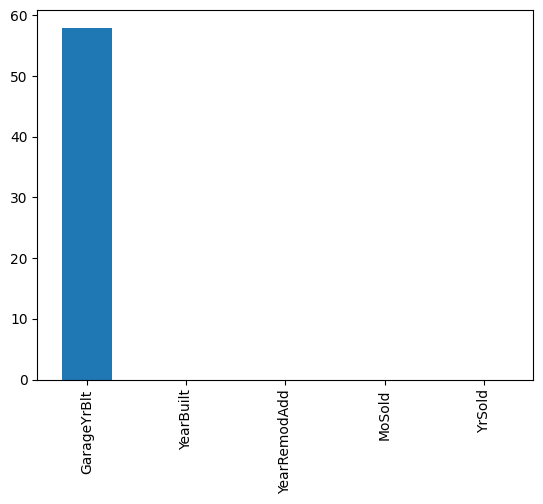

In [131]:
# Visualize missing values in our date variables
# YOUR CODE HERE

X_train[date_cols].isna().sum().sort_values(ascending=False).plot(kind='bar')

In [132]:
# Missing values in our numerical variables
# YOUR CODE HERE
Num_V = X_train[num_cols].isna().sum().sort_values(ascending=False)
Num_V

LotFrontage      212
MasVnrArea         6
GrLivArea          0
ScreenPorch        0
TotalBsmtSF        0
GarageArea         0
2ndFlrSF           0
TotRmsAbvGrd       0
OverallCond        0
BedroomAbvGr       0
FullBath           0
BsmtFinSF1         0
EnclosedPorch      0
1stFlrSF           0
MiscVal            0
Fireplaces         0
OverallQual        0
BsmtFullBath       0
3SsnPorch          0
OpenPorchSF        0
BsmtUnfSF          0
LotArea            0
BsmtFinSF2         0
KitchenAbvGr       0
BsmtHalfBath       0
PoolArea           0
LowQualFinSF       0
GarageCars         0
MSSubClass         0
HalfBath           0
WoodDeckSF         0
dtype: int64

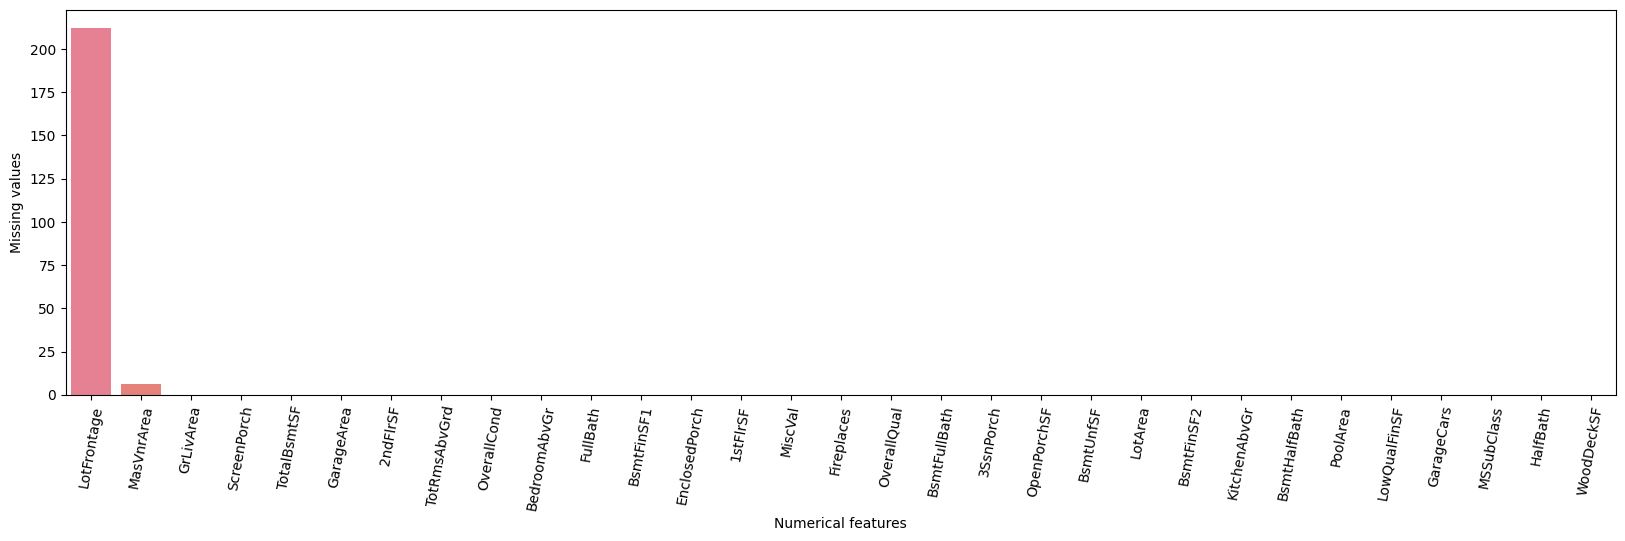

In [133]:
# Visualize missing values in our numerical variables
plt.figure(figsize=(20, 5))
sns.barplot(x=Num_V.index, y=Num_V.values, hue=Num_V.index)
plt.xlabel("Numerical features")
plt.ylabel("Missing values")
plt.xticks(rotation=80)
plt.show()

In [134]:
# Missing values in our categorical variables
# YOUR CODE HERE

X_train[cat_cols].isna().sum().sort_values(ascending=False)

PoolQC           1164
MiscFeature      1119
Alley            1097
Fence             954
MasVnrType        707
FireplaceQu       551
GarageType         58
GarageCond         58
GarageQual         58
GarageFinish       58
BsmtFinType2       29
BsmtFinType1       28
BsmtQual           28
BsmtExposure       28
BsmtCond           28
Electrical          1
Functional          0
KitchenQual         0
CentralAir          0
HeatingQC           0
Heating             0
PavedDrive          0
SaleType            0
MSZoning            0
Street              0
Condition2          0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
BldgType            0
Foundation          0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
ExterQual           0
ExterCond           0
SaleCondition       0
dtype: int64

<Axes: >

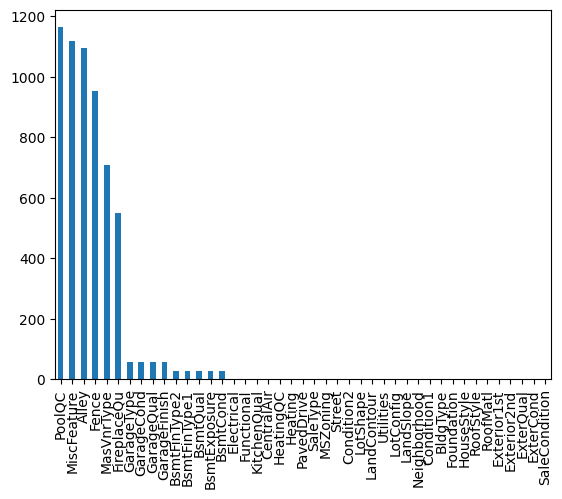

In [135]:
# Visualize missing values in our categorical variables
# YOUR CODE HERE

X_train[cat_cols].isna().sum().sort_values(ascending=False).plot(kind='bar')

### Handling missing data through imputation

<Axes: xlabel='LotFrontage', ylabel='Density'>

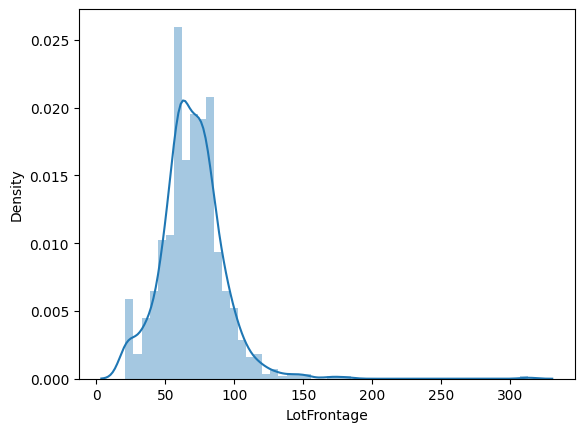

In [136]:
sns.distplot(X_train['LotFrontage'])

In [137]:
X_train['LotFrontage'].describe()

count    956.000000
mean      69.614017
std       22.946069
min       21.000000
25%       59.000000
50%       69.000000
75%       80.000000
max      313.000000
Name: LotFrontage, dtype: float64

<Axes: xlabel='MasVnrArea', ylabel='Density'>

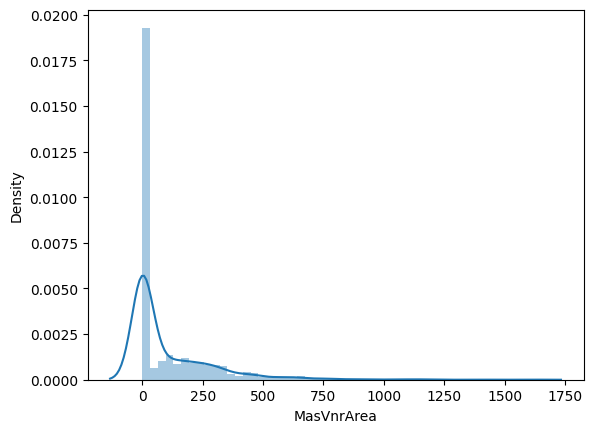

In [138]:
sns.distplot(X_train['MasVnrArea'])

In [139]:
X_train['MasVnrArea'].describe()

count    1162.000000
mean      103.481067
std       182.676225
min         0.000000
25%         0.000000
50%         0.000000
75%       167.750000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [140]:
# Imputate numerical variables
# YOUR CODE HERE
imputer_median = SimpleImputer(strategy='median')
X_train['LotFrontage'] = imputer_median.fit_transform(X_train['LotFrontage'].to_frame())
X_test['LotFrontage'] = imputer_median.transform(X_test['LotFrontage'].to_frame())

# YOUR CODE HERE

In [141]:
imputer_most_freq = SimpleImputer(strategy='most_frequent')
X_train['MasVnrArea'] = imputer_most_freq.fit_transform(X_train['MasVnrArea'].to_frame())
X_test['MasVnrArea'] = imputer_most_freq.transform(X_test['MasVnrArea'].to_frame())

In [142]:

imputer_const = SimpleImputer(strategy='constant', fill_value='missing')
X_train['GarageYrBlt'] = imputer_most_freq.fit_transform(X_train['GarageYrBlt'].to_frame())
X_test['GarageYrBlt'] = imputer_most_freq.transform(X_test['GarageYrBlt'].to_frame())

In [143]:
# Imputate categorical variables
# YOUR CODE HERE

imputer_const = SimpleImputer(strategy='constant', fill_value='missing')
X_train[cat_cols] = imputer_most_freq.fit_transform(X_train[cat_cols])
X_test[cat_cols] = imputer_most_freq.transform(X_test[cat_cols])

### Temporal features

Extracting information from the data to capture the difference in years between the year in which the house was built, and the year in which the house was sold.

In [149]:
# Create new temporal features from date variables
# YOUR CODE HERE

def calculate_diff_in_years(df, feature):
    df['cal_'+feature] = df['YrSold'] - df[feature]
    return df

In [150]:
# Apply it to both train and test set
# YOUR CODE HERE
for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    X_train = calculate_diff_in_years(X_train , var)
    X_test = calculate_diff_in_years(X_test , var)


In [151]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 618 to 684
Data columns (total 82 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        1168 non-null   int64  
 1   MSZoning          1168 non-null   object 
 2   LotFrontage       1168 non-null   float64
 3   LotArea           1168 non-null   int64  
 4   Street            1168 non-null   object 
 5   Alley             1168 non-null   object 
 6   LotShape          1168 non-null   object 
 7   LandContour       1168 non-null   object 
 8   Utilities         1168 non-null   object 
 9   LotConfig         1168 non-null   object 
 10  LandSlope         1168 non-null   object 
 11  Neighborhood      1168 non-null   object 
 12  Condition1        1168 non-null   object 
 13  Condition2        1168 non-null   object 
 14  BldgType          1168 non-null   object 
 15  HouseStyle        1168 non-null   object 
 16  OverallQual       1168 non-null   int64  
 17 

In [152]:
# Check that test set does not contain null values in the engineered variables
# YOUR CODE HERE
X_train[['cal_YearBuilt', 'cal_YearRemodAdd', 'cal_GarageYrBlt']].isna().sum()


cal_YearBuilt       0
cal_YearRemodAdd    0
cal_GarageYrBlt     0
dtype: int64

In [153]:
X_train[['cal_YearBuilt', 'cal_YearRemodAdd', 'cal_GarageYrBlt']]

,cal_YearBuilt,cal_YearRemodAdd,cal_GarageYrBlt
618,0,0,0.0
870,47,47,47.0
92,88,3,88.0
817,6,6,6.0
302,5,4,5.0
...,...,...,...
763,10,10,10.0
835,60,15,14.0
1216,32,32,32.0
559,3,2,3.0


### Checking for any Null still exists either in a train or test set

In [154]:
# Train set
# YOUR CODE HERE
X_train.isna().sum().sum()

0

In [155]:
# Test set
# YOUR CODE HERE
X_test.isna().sum().sum()

0

### Replacing  all rarely appearing categories with 'Rare':

The `RareLabelEncoder()` groups rare or infrequent categories in a new category called “`Rare`”, or any other name entered by the user.

In [156]:
# Encode rare categories
rare_enc = RareLabelEncoder(tol=0.01,  n_categories=5, variables = cat_cols)
rare_enc.fit(X_train)
X_train = rare_enc.transform(X_train)
X_test = rare_enc.transform(X_test)

### Checking for rare categories

In [158]:
output = [len(X_train[X_train[col] == 'Rare']) for col in cat_cols]

print(list(zip(cat_cols,output)))




[('MSZoning', 0), ('Street', 0), ('Alley', 0), ('LotShape', 0), ('LandContour', 0), ('Utilities', 0), ('LotConfig', 0), ('LandSlope', 0), ('Neighborhood', 18), ('Condition1', 23), ('Condition2', 8), ('BldgType', 0), ('HouseStyle', 17), ('RoofStyle', 27), ('RoofMatl', 22), ('Exterior1st', 6), ('Exterior2nd', 20), ('MasVnrType', 0), ('ExterQual', 0), ('ExterCond', 0), ('Foundation', 7), ('BsmtQual', 0), ('BsmtCond', 0), ('BsmtExposure', 0), ('BsmtFinType1', 0), ('BsmtFinType2', 11), ('Heating', 12), ('HeatingQC', 0), ('CentralAir', 0), ('Electrical', 0), ('KitchenQual', 0), ('Functional', 14), ('FireplaceQu', 0), ('GarageType', 11), ('GarageFinish', 0), ('GarageQual', 0), ('GarageCond', 0), ('PavedDrive', 0), ('PoolQC', 0), ('Fence', 0), ('MiscFeature', 0), ('SaleType', 20), ('SaleCondition', 10)]


### Encoding of Categorical variables

Transform the string values of categorical variables into numerical values.

In [159]:
# Encode with labels
ordinal_enc = OrdinalEncoder_Sk(handle_unknown='use_encoded_value',unknown_value=-999)
X_train[cat_cols] = ordinal_enc.fit_transform(X_train[cat_cols])
X_test[cat_cols] = ordinal_enc.transform(X_test[cat_cols])

In [160]:
# Check any null values in test set
# YOUR CODE HERE
X_test.isna().sum().sum()

0

### Building Pipeline for Pre-Processing

All the pre-processing steps above can be implemented inside Pre-Processing Pipeline. Building a pipeline removes the dual task of hard coding for the same operation on the train and test set separately. Apart from this, it helps in the automation of testing and deployment without much human intervention.

#### Creating Class for temporal transformation that is compatible with SK_learn pipeline:

In the pre-processing steps above, a function was created to calculate the year elapsed. Now we are converting that function into a class suitable for inserting inside the pipeline.

In [161]:
from sklearn.base import BaseEstimator, TransformerMixin

# YOUR CODE HERE
class TemporalVariableTransformer(BaseEstimator, TransformerMixin):

    def __init__(self, variables, reference_variable):
        self.variables = variables
        self.reference_variable = reference_variable

    def fit(self, X, y=None):
        return self

    def transform(self, X, y = None):
        for feature in self.variables:
            X['calc_'+ feature] = X[self.reference_variable] - X[feature]
        return X


#### Building the Pre-Processing pipeline

In [163]:
price_pipe = Pipeline([

    # ===== IMPUTATION =====
    # impute numerical variables with the ArbitraryNumberImputer
    # YOUR CODE HERE,
    ('arbitary_number_imputer', ArbitraryNumberImputer(arbitrary_number=-1, variables='LotFrontage' )),
     # impute numerical variables with the mostfrequent
    ('frequent_number_imputation', CategoricalImputer(imputation_method='frequent', variables=num_cols, ignore_format=True)),
    # impute categorical variables with string missing
    # YOUR CODE HERE,
    ('missing_imputation', CategoricalImputer(imputation_method='missing', variables=cat_cols, ignore_format=True)),
    # == TEMPORAL VARIABLES ====
    ('elapsed_time', TemporalVariableTransformer(
        variables=['YearBuilt', 'YearRemodAdd', 'GarageYrBlt'], reference_variable='YrSold')),

    # YOUR CODE HERE,
    ('drop_features', DropFeatures(features_to_drop=['YearBuilt', 'YearRemodAdd', 'GarageYrBlt'])),
      # == CATEGORICAL ENCODING
    ('rare_label_encoder', RareLabelEncoder(tol=0.01, n_categories=5, variables=cat_cols)),

    # encode categorical and discrete variables using the target mean
    # YOUR CODE HERE, #
    ('categorical_encoder', OrdinalEncoder(encoding_method='ordered', variables=cat_cols))
])

Since we have already done pre-processing before the pipeline, we can't apply the pipeline to pre-preprocessed data. To apply the pipeline, copy the same train-test split cell again here so that we can get un-processed data as a train and test set.

In [164]:
# YOUR CODE HERE
data = pd.read_csv('housing_dataset.csv')
data.drop('Id', inplace=True, axis=1)
X_train, X_test, y_train, y_test = train_test_split(data.drop('SalePrice', axis=1), # predictors
                                                    data.SalePrice, # target
                                                    test_size=0.1,
                                                    random_state=0)  # for reproducibility

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1314, 79), (146, 79), (1314,), (146,))

### Finally applying pipeline in train & test set

In [165]:
# YOUR CODE HERE
price_pipe.fit(X_train,y_train)




Pipeline(steps=[('arbitary_number_imputer',
                 ArbitraryNumberImputer(arbitrary_number=-1,
                                        variables='LotFrontage')),
                ('frequent_number_imputation',
                 CategoricalImputer(ignore_format=True,
                                    imputation_method='frequent',
                                    variables=['GrLivArea', 'BsmtFullBath',
                                               'HalfBath', 'MSSubClass',
                                               'GarageCars', 'LotFrontage',
                                               'LowQualFinSF', 'PoolArea',
                                               'BsmtHalfBath', 'KitchenAbv...
                                           'LotShape', 'LandContour',
                                           'Utilities', 'LotConfig',
                                           'LandSlope', 'Neighborhood',
                                           'Condition1', 'Condition2',
                                           'BldgType', 'HouseStyle',
                                           'RoofStyle', 'RoofMatl',
                                           'Exterior1st', 'Exterior2nd',
                                           'MasVnrType', 'ExterQual',
                                           'ExterCond', 'Foundation',
                                           'BsmtQual', 'BsmtCond',
                                           'BsmtExposure', 'BsmtFinType1',
                                           'BsmtFinType2', 'Heating',
                                           'HeatingQC', 'CentralAir',
                                           'Electrical', ...]))])

In [169]:
# YOUR CODE HERE # Transformation for train set
X_train_tfr = price_pipe.transform(X_train)

In [170]:
X_test_tfr=price_pipe.transform(X_test) # Transformation for test set

In [171]:
X_train_tfr

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,calc_YearBuilt,calc_YearRemodAdd,calc_GarageYrBlt
930,20,3,73.0,8925,1,2,1,3,1,1,0,19,3,1,4,4,8,5,0,0,9,9,1,0.0,2,3,4,3,3,3,6,16,4,0,1450,1466,2,4,1,3,1466,0,0,1466,0,0,2,0,3,1,2,7,4,0,1,4,3,3,610,2,3,2,100,18,0,0,0,0,0,4,3,0,7,2009,2,3,2,2,2.0
656,20,3,72.0,10007,1,2,1,1,1,1,0,8,3,1,4,4,5,7,0,0,4,5,2,54.0,2,3,2,2,3,1,4,806,4,0,247,1053,2,4,1,3,1053,0,0,1053,1,0,1,1,3,1,2,5,4,0,1,4,2,1,312,2,3,2,0,0,0,0,0,0,0,2,3,0,8,2008,2,3,49,2,49.0
45,120,3,61.0,7658,1,2,0,1,1,1,0,21,3,1,3,4,9,5,2,0,2,2,2,412.0,3,3,4,4,3,1,6,456,4,0,1296,1752,2,4,1,3,1752,0,0,1752,1,0,2,0,2,1,3,6,4,1,4,4,2,2,576,2,3,2,196,82,0,0,0,0,0,4,3,0,2,2010,2,3,5,5,5.0
1348,20,3,-1.0,16196,1,2,2,2,1,1,0,10,3,1,4,4,7,5,0,0,9,9,1,0.0,2,3,4,3,3,4,6,1443,4,0,39,1482,2,4,1,3,1494,0,0,1494,1,0,2,0,3,1,2,5,4,1,2,4,2,2,514,2,3,2,402,25,0,0,0,0,0,4,3,0,8,2007,2,3,9,9,9.0
55,20,3,100.0,10175,1,2,1,1,1,1,0,8,3,1,4,4,6,5,0,0,4,6,2,272.0,1,3,2,2,3,1,2,490,4,0,935,1425,2,3,1,3,1425,0,0,1425,0,0,2,0,3,1,1,7,4,1,4,4,2,2,576,2,3,2,0,0,0,407,0,0,0,4,3,0,7,2008,2,3,44,44,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,60,3,82.0,9430,1,2,0,1,1,1,0,22,3,1,4,5,8,5,0,0,9,9,2,673.0,2,3,4,3,3,2,6,1163,4,0,89,1252,2,4,1,3,1268,1097,0,2365,1,0,2,1,3,1,2,8,4,1,4,4,2,3,856,2,3,2,0,128,0,0,180,0,0,4,3,0,7,2009,2,3,10,10,10.0
835,20,3,60.0,9600,1,2,0,1,1,1,0,6,3,1,4,4,4,7,0,0,9,5,1,0.0,1,3,2,3,3,1,2,442,4,0,625,1067,2,2,1,3,1067,0,0,1067,0,0,2,0,2,1,2,4,1,0,1,4,1,2,436,2,3,2,290,0,0,0,0,0,0,4,3,0,2,2010,2,3,60,15,14.0
1216,90,1,68.0,8930,1,2,0,1,1,1,0,6,4,1,1,1,6,5,0,0,9,9,1,0.0,1,3,0,0,1,0,0,0,0,0,0,0,2,2,1,3,1318,584,0,1902,0,0,2,0,4,2,1,8,4,0,1,4,1,2,539,2,3,2,0,0,0,0,0,0,0,4,3,0,4,2010,2,3,32,32,32.0
559,120,3,-1.0,3196,1,2,0,1,1,1,0,14,3,1,3,4,7,5,0,0,9,9,2,18.0,2,3,4,3,3,4,5,0,4,0,1374,1374,2,4,1,3,1557,0,0,1557,0,0,2,0,2,1,2,7,4,1,3,4,3,2,420,2,3,2,143,20,0,0,0,0,0,4,3,0,10,2006,2,3,3,2,3.0


In [172]:
X_test_tfr

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,calc_YearBuilt,calc_YearRemodAdd,calc_GarageYrBlt
529,20,3,-1.0,32668,1,2,1,1,1,4,0,17,3,1,4,4,6,3,2,0,1,7,1,0.0,2,3,4,2,3,1,1,1219,4,0,816,2035,2,2,1,3,2515,0,0,2515,1,0,3,0,4,2,1,9,0,2,3,4,2,2,484,2,3,2,0,0,200,0,0,0,0,4,3,0,3,2007,2,1,50,32,32.0
491,50,3,79.0,9490,1,2,0,1,1,1,0,8,0,1,4,1,6,7,0,0,1,1,1,0.0,1,3,2,2,3,1,2,403,3,165,238,806,2,2,1,2,958,620,0,1578,1,0,1,0,3,1,0,5,4,2,3,4,1,1,240,2,3,2,0,0,32,0,0,0,0,2,3,0,8,2006,2,3,65,56,65.0
459,50,3,-1.0,7015,1,2,1,0,1,2,0,4,3,1,4,1,5,4,0,0,2,2,0,161.0,1,3,2,2,3,1,3,185,4,0,524,709,2,2,1,3,979,224,0,1203,1,0,1,0,3,1,2,5,4,1,3,2,1,1,352,2,3,2,0,0,248,0,0,0,0,4,3,0,7,2009,2,3,59,59,59.0
279,60,3,83.0,10005,1,2,0,1,1,1,0,16,3,1,4,5,7,5,2,0,7,6,2,299.0,1,3,2,3,3,1,2,392,4,0,768,1160,2,4,1,3,1156,866,0,2022,0,0,2,1,4,1,1,8,4,1,3,4,3,2,505,2,3,2,288,117,0,0,0,0,0,4,3,0,3,2008,2,3,31,31,31.0
655,160,1,21.0,1680,1,2,0,1,1,1,0,2,3,1,2,5,6,5,0,0,4,7,2,381.0,1,3,2,2,3,1,5,0,4,0,525,525,2,2,1,3,525,567,0,1092,0,0,1,1,3,1,1,6,4,0,1,2,1,1,264,2,3,2,0,0,0,0,0,0,0,4,3,0,3,2010,2,2,39,39,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,180,1,35.0,3675,1,2,0,1,1,1,0,3,3,1,3,3,5,5,0,0,9,9,2,80.0,1,3,4,3,3,4,6,547,4,0,0,547,2,3,1,3,1072,0,0,1072,1,0,1,0,2,1,1,5,4,0,1,3,3,2,525,2,3,2,0,28,0,0,0,0,0,4,3,0,5,2006,2,3,1,1,1.0
113,20,3,-1.0,21000,1,2,0,0,1,2,0,17,3,1,4,4,6,5,2,0,1,1,2,184.0,1,2,2,3,3,2,4,35,3,869,905,1809,2,2,1,3,2259,0,0,2259,1,0,2,0,3,1,2,7,4,2,4,3,1,2,450,2,3,2,166,120,192,0,0,0,0,2,3,0,10,2007,0,0,54,54,54.0
1282,20,3,61.0,8800,1,2,1,1,1,1,0,15,3,1,4,4,5,7,0,0,4,5,1,0.0,1,3,2,3,3,2,3,532,3,144,364,1040,2,2,1,3,1040,0,0,1040,0,0,2,0,3,1,2,5,4,0,1,2,1,2,484,2,3,2,0,0,0,0,288,0,0,4,3,0,9,2009,2,3,32,1,32.0
1163,90,3,60.0,12900,1,2,0,1,1,1,0,6,1,1,1,0,4,4,0,0,7,6,1,0.0,1,3,2,3,3,3,6,1198,4,0,0,1198,2,2,1,3,1258,0,0,1258,2,0,0,2,0,2,1,6,4,0,1,1,1,2,400,1,3,2,120,0,0,0,0,0,0,4,3,0,1,2008,2,1,39,39,39.0


## XG-Boost Regressor

In [173]:
# Create an xgboost regression model
model = xgb.XGBRegressor(n_estimators=100, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8, objective='reg:squarederror', random_state=0)

**Note :**  Good hyperparameter values can be found by trial and error for a given dataset, or systematic experimentation such as using a grid search across a range of values.

**The most commonly configured hyperparameters are the following:**

**n_estimators:** The number of trees in the ensemble, often increased until no further improvements are seen.

**max_depth:** The maximum depth of each tree, often values are between 1 and 10.

**eta:** The learning rate used to weight each model, often set to small values such as 0.3, 0.1, 0.01, or smaller.

**subsample:** The number of samples (rows) used in each tree, set to a value between 0 and 1, often 1.0 to use all samples.

**colsample_bytree:** Number of features (columns) used in each tree, set to a value between 0 and 1, often 1.0 to use all features.

**XGBoost Parameters Detail** - [Ref.](https://xgboost.readthedocs.io/en/stable/parameter.html)

In [175]:
# Train on training set
# YOUR CODE HERE
model.fit(X_train_tfr, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [176]:
# Evaluate the model:
# Evaluate performance using the mean squared error and the root of the mean squared error
# YOUR CODE HERE
pred = model.predict(X_train_tfr)
print('linear train mse: {}'.format(mean_squared_error(y_train, pred)))
print('linear train rmse: {}'.format(sqrt(mean_squared_error(y_train, pred))))
print()

pred = model.predict(X_test_tfr)
print('linear test mse: {}'.format(mean_squared_error(y_test, pred)))
print('linear test rmse: {}'.format(sqrt(mean_squared_error(y_test, pred))))

linear train mse: 19892666.923945945
linear train rmse: 4460.1196087040025

linear test mse: 848315432.919248
linear test rmse: 29125.855059023554


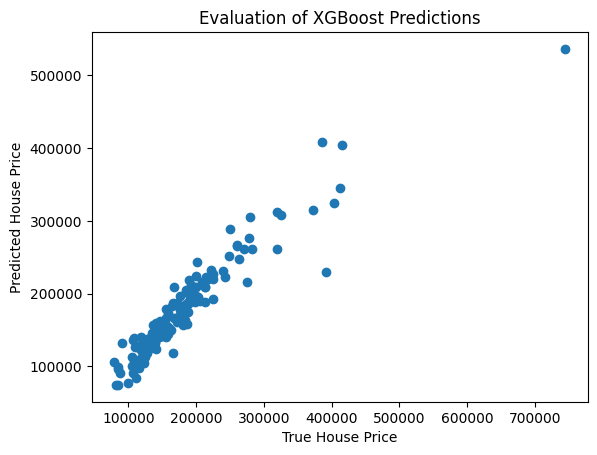

In [177]:
# Evaluating predictions with respect to the original price
# YOUR CODE HERE
plt.scatter(y_test, model.predict(X_test_tfr))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of XGBoost Predictions')
plt.show()

### Displaying the feature importance value given by the XG-Boost model

In [178]:
# List features
# YOUR CODE HERE
print(X_train_tfr.columns.to_list())

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'Yr

In [179]:
# Feature importance given by XGB
# YOUR CODE HERE
print(model.feature_importances_)

[6.53958821e-04 1.31075084e-03 2.14276323e-03 2.97345896e-03
 0.00000000e+00 4.85835626e-04 8.72887496e-04 6.32470101e-03
 0.00000000e+00 1.21528190e-03 9.95208742e-04 3.70972008e-02
 1.01048860e-03 0.00000000e+00 3.53499153e-03 9.82037396e-04
 2.59061396e-01 3.08123883e-03 1.03668240e-03 7.50778301e-04
 1.32160354e-03 1.86669303e-03 6.62219652e-04 4.09757672e-03
 1.69441506e-01 1.94187951e-03 3.07357474e-03 6.94211712e-03
 1.32603908e-03 4.14735405e-03 1.93285150e-03 9.10210423e-03
 1.46452757e-03 2.26078392e-03 1.86285842e-03 6.81032846e-03
 1.78031376e-04 1.89373025e-03 1.41706923e-02 1.04878074e-03
 2.62593571e-02 1.00845490e-02 0.00000000e+00 2.11377759e-02
 3.09557118e-03 1.66846509e-03 1.42945023e-02 2.22195568e-03
 2.07328796e-03 1.19805215e-02 1.29349884e-02 1.23020494e-02
 1.81075139e-03 5.10682818e-03 4.92069172e-03 2.30432185e-03
 5.14610158e-03 2.59224653e-01 8.35670996e-03 2.00454844e-03
 4.94411262e-03 7.92370469e-04 2.46937736e-03 2.24321452e-03
 9.78600117e-04 1.868292

In [180]:
# Feature Importance in dataframe
# YOUR CODE HERE
dfeature = pd.DataFrame({'Var': X_train_tfr.columns.to_list(),
                         'Importance': model.feature_importances_}).sort_values(by='Importance', ascending=False)
dfeature

,Var,Importance
57,GarageCars,0.259225
16,OverallQual,0.259061
24,ExterQual,0.169442
11,Neighborhood,0.037097
40,1stFlrSF,0.026259
43,GrLivArea,0.021138
46,FullBath,0.014295
38,CentralAir,0.014171
50,KitchenQual,0.012935
51,TotRmsAbvGrd,0.012302


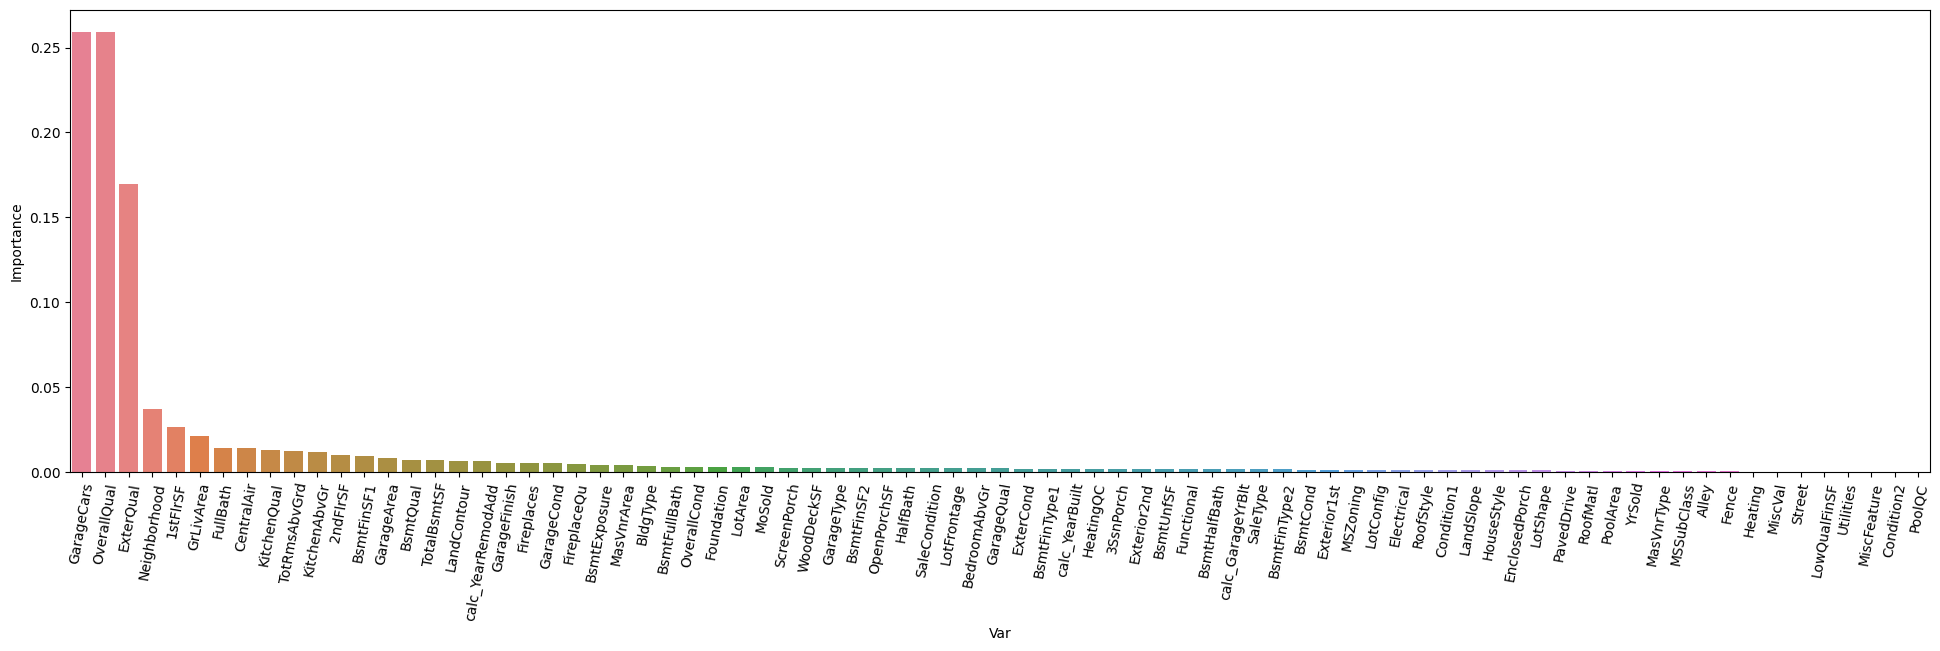

In [181]:
# Plot bar plot showing feature importances
# YOUR CODE HERE
# Plot bar plot showing feature importances
plt.figure(figsize=(24, 6))
sns.barplot(x=dfeature['Var'], y=dfeature['Importance'], hue=dfeature['Var'])
plt.xticks(rotation=80)
plt.show()

We can pick features having the highest feature importance values,  for example choosing the top 15:

In [182]:
# Top 15 features
dfeature[:16]['Var'].to_list()

['GarageCars',
 'OverallQual',
 'ExterQual',
 'Neighborhood',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'CentralAir',
 'KitchenQual',
 'TotRmsAbvGrd',
 'KitchenAbvGr',
 '2ndFlrSF',
 'BsmtFinSF1',
 'GarageArea',
 'BsmtQual',
 'TotalBsmtSF']

## Feature Selection

Above manual selection of best features can be done automatically using Scikit-Learn's `SelectFromModel` class. Here, we need to specify the model which has `feature_importances_` or `coef_` attribute after fitting, then train it.

In [183]:
# Feature selection using SelectFromModel, with XGBoost Regressor

sel_ = SelectFromModel(xgb.XGBRegressor(n_estimators=150, objective='reg:squarederror', random_state=0))
sel_.fit(X_train_tfr, y_train)

SelectFromModel(estimator=XGBRegressor(base_score=None, booster=None,
                                       callbacks=None, colsample_bylevel=None,
                                       colsample_bynode=None,
                                       colsample_bytree=None, device=None,
                                       early_stopping_rounds=None,
                                       enable_categorical=False,
                                       eval_metric=None, feature_types=None,
                                       gamma=None, grow_policy=None,
                                       importance_type=None,
                                       interaction_constraints=None,
                                       learning_rate=None, max_bin=None,
                                       max_cat_threshold=None,
                                       max_cat_to_onehot=None,
                                       max_delta_step=None, max_depth=None,
                                       max_leaves=None, min_child_weight=None,
                                       missing=nan, monotone_constraints=None,
                                       multi_strategy=None, n_estimators=150,
                                       n_jobs=None, num_parallel_tree=None,
                                       random_state=0, ...))

In [184]:
# Show the number of total features and selected features
# YOUR CODE HERE
selected_feat = X_train_tfr.columns[(sel_.get_support())]
print('total features: {}'.format((X_train_tfr.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 79
selected features: 10


In [185]:
selected_feat

Index(['Neighborhood', 'OverallQual', 'RoofMatl', 'BsmtQual', 'CentralAir',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'GarageCars'],
      dtype='object')

## Re-build model with selected features

In [186]:
# YOUR CODE HERE
model.fit(X_train_tfr[selected_feat], y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [187]:
# Evaluate performance using the mean squared error and the root of the mean squared error
pred = model.predict(X_train_tfr[selected_feat])
print('linear train mse: {}'.format(mean_squared_error(y_train, pred)))
print('linear train rmse: {}'.format(sqrt(mean_squared_error(y_train, pred))))
print()
pred = model.predict(X_test_tfr[selected_feat])
print('linear test mse: {}'.format(mean_squared_error(y_test, pred)))
print('linear test rmse: {}'.format(sqrt(mean_squared_error(y_test, pred))))

linear train mse: 100636918.20565218
linear train rmse: 10031.795363027108

linear test mse: 1060672486.5434787
linear test rmse: 32567.967184696663


### Evaluating predictions with respect to the original price

Text(0.5, 1.0, 'Evaluation of XGBoost Predictions')

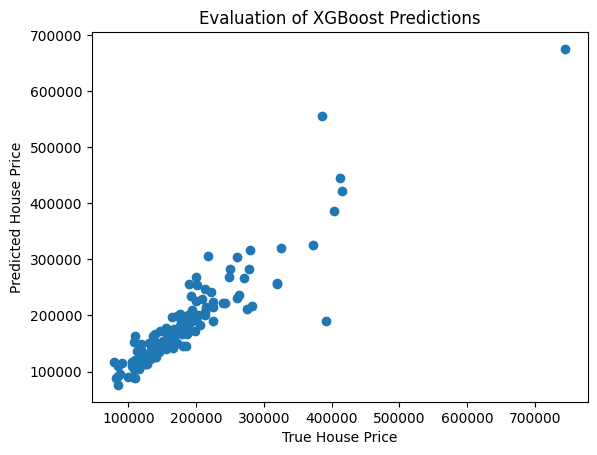

In [188]:
# Evaluating predictions with respect to the original price
# YOUR CODE HERE
plt.scatter(y_test, model.predict(X_test_tfr[selected_feat]))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of XGBoost Predictions')

## Training XGBoost without Pre-Processing

XGBoost can handle categorical variable( [Ref.](https://xgboost.readthedocs.io/en/stable/tutorials/categorical.html) )and supports missing values by default. In tree algorithms, branch directions for missing values are learned during training. Note that the gblinear booster treats missing values as zeros. When the missing parameter is specifed, values in the input predictor that is equal to missing will be treated as missing and removed. By default it’s set to NaN.Considering the same we are going to train without pre-processing and compare the result.([Ref.](https://xgboost.readthedocs.io/en/stable/faq.html))

In [189]:
data_no_pro = pd.read_csv('housing_dataset.csv')
print(data.shape)
data_no_pro.head()

(1460, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [190]:
# YOUR CODE HERE
cat_cols = list(X_train.select_dtypes(exclude=np.number))

In [191]:
# YOUR CODE HERE
data_no_pro[cat_cols] = data_no_pro[cat_cols].apply(lambda x: x.astype('category'))

In [192]:
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(data_no_pro.drop(['SalePrice','Id'], axis=1),
                                                    data_no_pro.SalePrice,
                                                    test_size=0.1,
                                                    random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1314, 79), (146, 79), (1314,), (146,))

### Temporal features
Extracting information from the data to capture the difference in years between the year in which the house was built, and the year in which the house was sold.

In [193]:
# Create new temporal features from date variables
# YOUR CODE HERE
def calculate_diff_in_years(df, feature):
    df['cal_'+feature] = df['YrSold'] - df[feature]
    return df


In [194]:
# Apply it to both train and test set
# YOUR CODE HERE
for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    X_train = calculate_diff_in_years(X_train , var)
    X_test = calculate_diff_in_years(X_test , var)


In [195]:
X_train=X_train.drop(columns=['YearBuilt', 'YearRemodAdd', 'GarageYrBlt'])
X_test=X_test.drop(columns=['YearBuilt', 'YearRemodAdd', 'GarageYrBlt'])

###Modelling with unprocessed features



In [196]:
# Create an xgboost regression model
# YOUR CODE HERE
model_no_pro = xgb.XGBRegressor(n_estimators=100,max_depth=6, eta=0.1, subsample=0.7, colsample_bytree=0.8, objective='reg:squarederror', random_state=0, enable_categorical=True, tree_method='approx')

In [197]:
# Train on training set
model_no_pro.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=True, eta=0.1, eval_metric=None,
             feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

**Note - Hyperparameters:**   **enable_categorical** - [Ref.](https://xgboost.readthedocs.io/en/stable/tutorials/categorical.html), **tree_method** - [Ref.](https://xgboost.readthedocs.io/en/stable/parameter.html)

In [198]:
# Evaluate the model:
# Evaluate performance using the mean squared error and the root of the mean squared error
pred = model_no_pro.predict(X_train)
print('linear train mse: {}'.format(mean_squared_error(y_train, pred)))
print('linear train rmse: {}'.format(sqrt(mean_squared_error(y_train, pred))))
print()
pred = model_no_pro.predict(X_test)
print('linear test mse: {}'.format(mean_squared_error(y_test, pred)))
print('linear test rmse: {}'.format(sqrt(mean_squared_error(y_test, pred))))

linear train mse: 28102781.590736367
linear train rmse: 5301.205673310211

linear test mse: 920243199.4172852
linear test rmse: 30335.510534970155


### Please answer the questions below to complete the experiment:




In [199]:
#@title  Which of the following is/are the hyperparameter/s used in XG-Boost? { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "All of the above" #@param ["", "learning_rate(eta)", "min_split_loss(gamma)", "max_depth", "All of the above"]

In [200]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [203]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "NA" #@param {type:"string"}


In [204]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [205]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Somewhat Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [206]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Somewhat Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [207]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 2969
Date of submission:  14 Apr 2024
Time of submission:  23:27:42
View your submissions: https://aimlops-iisc.talentsprint.com/notebook_submissions
